# Entropy Graphs Displaying
#### Explore the entropy representation through small ARC tasks

## Imports
- Graph class converts a given board into an entropy based complete graph instance
- Solver class allows to extract tasks from data, to display them in many ways.

In [1]:
import random
from abstract_and_reason.graph_network import Graph
from abstract_and_reason.solver import Solver

## Solver intialization 
in order to get challenges from data folder, and display them

In [2]:
anr = Solver()

# challenges = anr.evaluation_challenges
# solutions = anr.evaluation_solutions

challenges = anr.training_challenges
solutions = anr.training_solutions

## Gather a set of small tasks from ARC dataset


In [3]:
def get_smol_arc(challenges, max_n, max_m):
    ids = list(challenges)
    ids_sizes = []
    for challenge_id in ids:
        input_mean = 0
        output_mean = 0
        nb_example = 0
        for challenge in challenges[challenge_id]['train']:
            input_size = sum(len(obj) for obj in challenge['input']) * len(challenge['input'])
            output_size = sum(len(obj) for obj in challenge['output']) * len(challenge['output'])
            input_mean += input_size
            output_mean += output_size
            nb_example += 1
        input_mean /= nb_example
        output_mean /= nb_example
        if input_mean <= max_n**2 and output_mean <= max_m**2:
            ids_sizes.append(challenge_id)
    return ids_sizes
smols = get_smol_arc(challenges, max_n=8, max_m=8)
len(smols)

26

# Displaying of a random small task

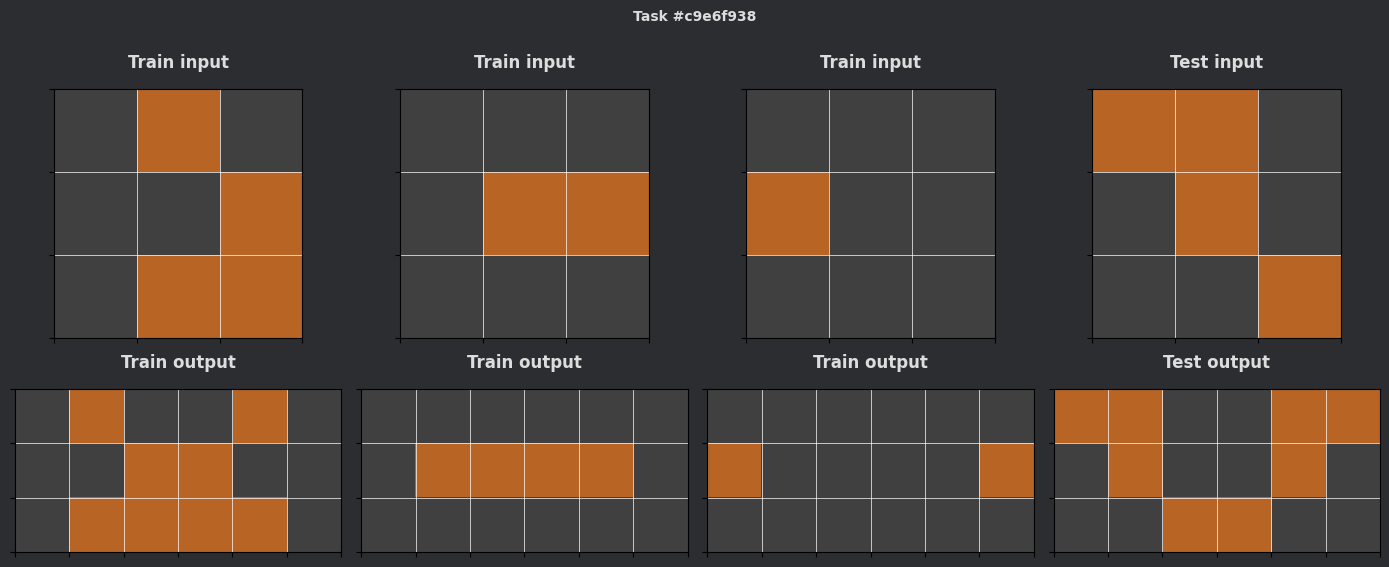

In [4]:
random_id = random.choice(smols)

puzzle_inps_train, puzzle_outs_train, puzzle_inps_test, puzzle_outs_test = anr.process_challenge(random_id, challenges, solutions)
anr.display_task(random_id, puzzle_inps_train, puzzle_outs_train, puzzle_inps_test, puzzle_outs_test)

## DualGraphVisualizer

#### Bellow class allows to display 2 matplotlib graphs side to side

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

class DualGraphVisualizer:
    def __init__(self, graph1, graph2):
        """
        Initializes the DualGraphVisualizer instance.

        Parameters:
        - graph1: The first graph object to visualize.
        - graph2: The second graph object to visualize.
        """
        self.graph1 = graph1
        self.graph2 = graph2

    def draw_with_matplotlib(self, show_edges=True, show_node_values=False):
        """
        Visualizes the two graphs side by side using Matplotlib.

        Parameters:
        - show_edges (bool): Whether to display the edges between nodes. Default is True.
        - show_node_values (bool): Whether to display node values as labels. Default is False.
        """
        fig, axes = plt.subplots(1, 2, figsize=(25, 10))

        # Draw the first graph on the first subplot
        self._draw_graph(self.graph1, ax=axes[0], title="Input", show_edges=show_edges, show_node_values=show_node_values)

        # Draw the second graph on the second subplot
        self._draw_graph(self.graph2, ax=axes[1], title="Output", show_edges=show_edges, show_node_values=show_node_values)
        fig.set_facecolor("black")
        plt.show()

    def _draw_graph(self, graph, ax, title="", show_edges=True, show_node_values=True):
        """
        Draws a single graph on the given Matplotlib axis.

        Parameters:
        - graph: The graph object to be drawn.
        - ax: The Matplotlib axis where the graph will be drawn.
        - title (str): The title for the subplot.
        - show_edges (bool): Whether to show edges between nodes. Default is True.
        - show_node_values (bool): Whether to show the values of the nodes as labels. Default is True.
        """
        G = nx.Graph()

        # Flip the y-coordinates so that (0,0) starts at the top-left
        max_y = max(node.coords[0][1] for node in graph.nodes)
        pos = {node: (node.coords[0][0], max_y - node.coords[0][1]) for node in graph.nodes}
        G.add_nodes_from(pos.keys())

        # Add edges
        if show_edges:
            for node in graph.nodes:
                for connected_node in node.connections:
                    if not G.has_edge(node, connected_node):
                        if len(node.connections) > 0:
                            if graph.max_entropy != graph.min_entropy:
                                normalized_entropy = node.norm_entropies[node.connections.index(connected_node)]
                            else:
                                normalized_entropy = 1
                        G.add_edge(node, connected_node, weight=normalized_entropy)
                              
        # Set background color
        ax.set_facecolor("#000000")

        # Draw the nodes
        nx.draw_networkx_nodes(
            G, pos,
            ax=ax,
            node_color=[graph.color_map[node.value] for node in G.nodes()],
            node_size=500
        )
        
        # Draw edges with varying opacity and width based on weight
        for (u, v, d) in G.edges(data=True):
            nx.draw_networkx_edges(
                G, pos,
                edgelist=[(u, v)],
                ax=ax,
                width=5 * d['weight'],  # Adjust width based on weight
                edge_color=plt.cm.viridis(d['weight'])  # Use weight for color mapping
            )

        # Conditionally draw node labels based on show_node_values parameter
        if show_node_values:
            for node, (x, y) in pos.items():
                ax.text(x, y + 0.1, str(node.value), fontsize=25, ha='center', color="#ffffff")

        ax.set_title(title, color="#ffffff")
        ax.set_xticks([])
        ax.set_yticks([])

## Entropy based graphs displaying

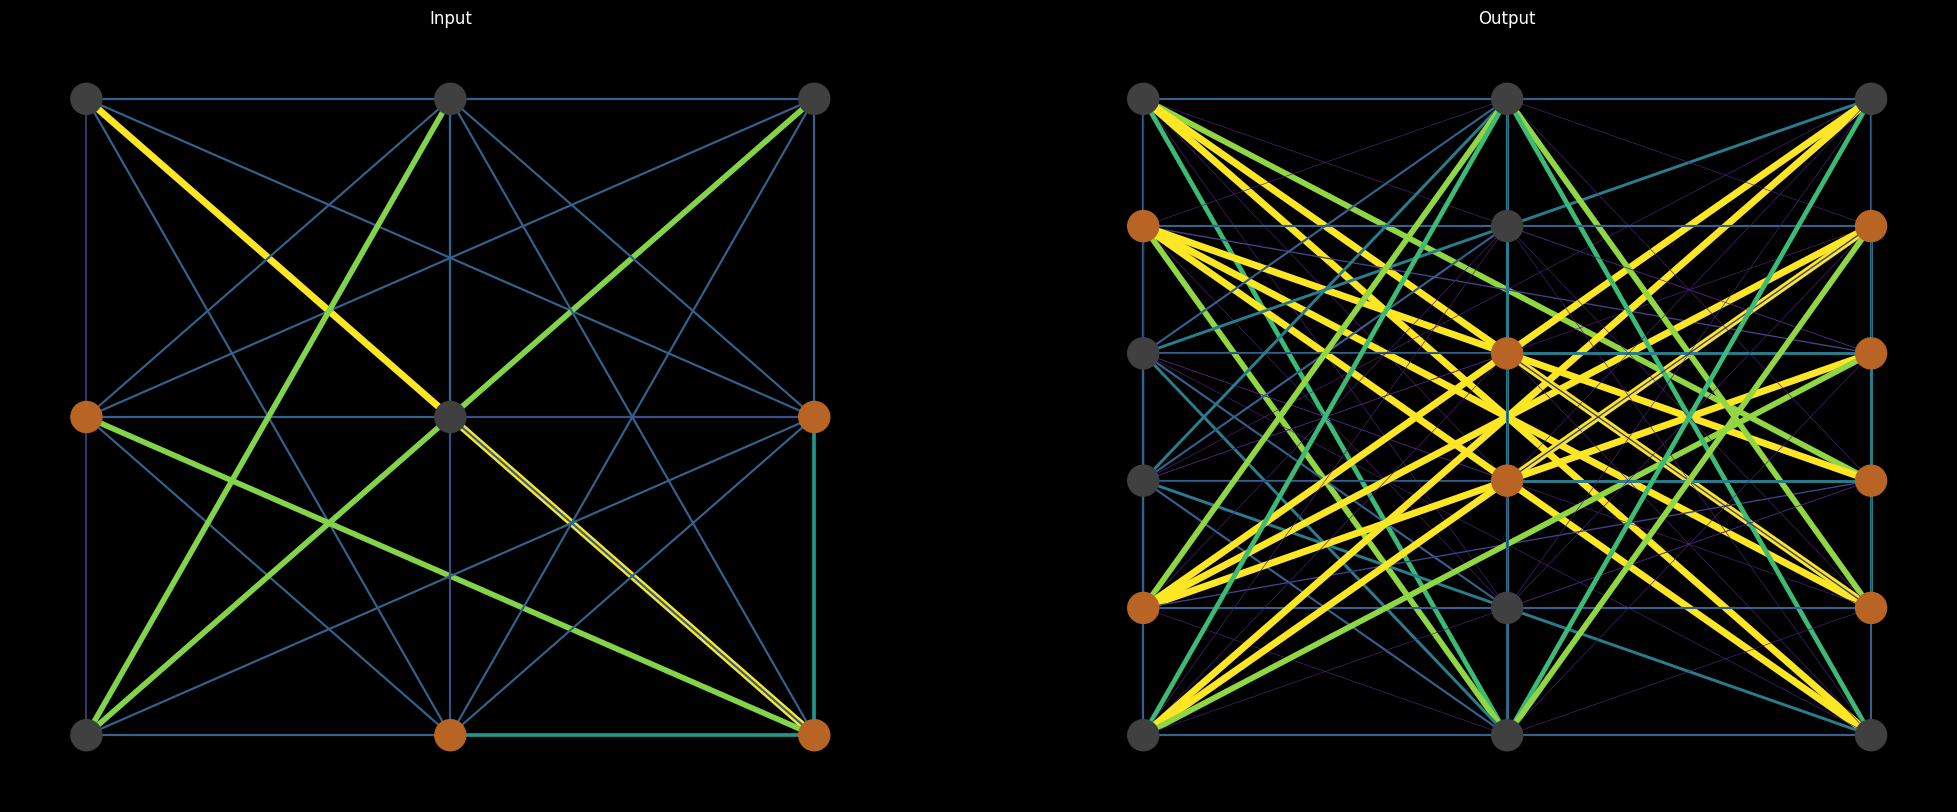

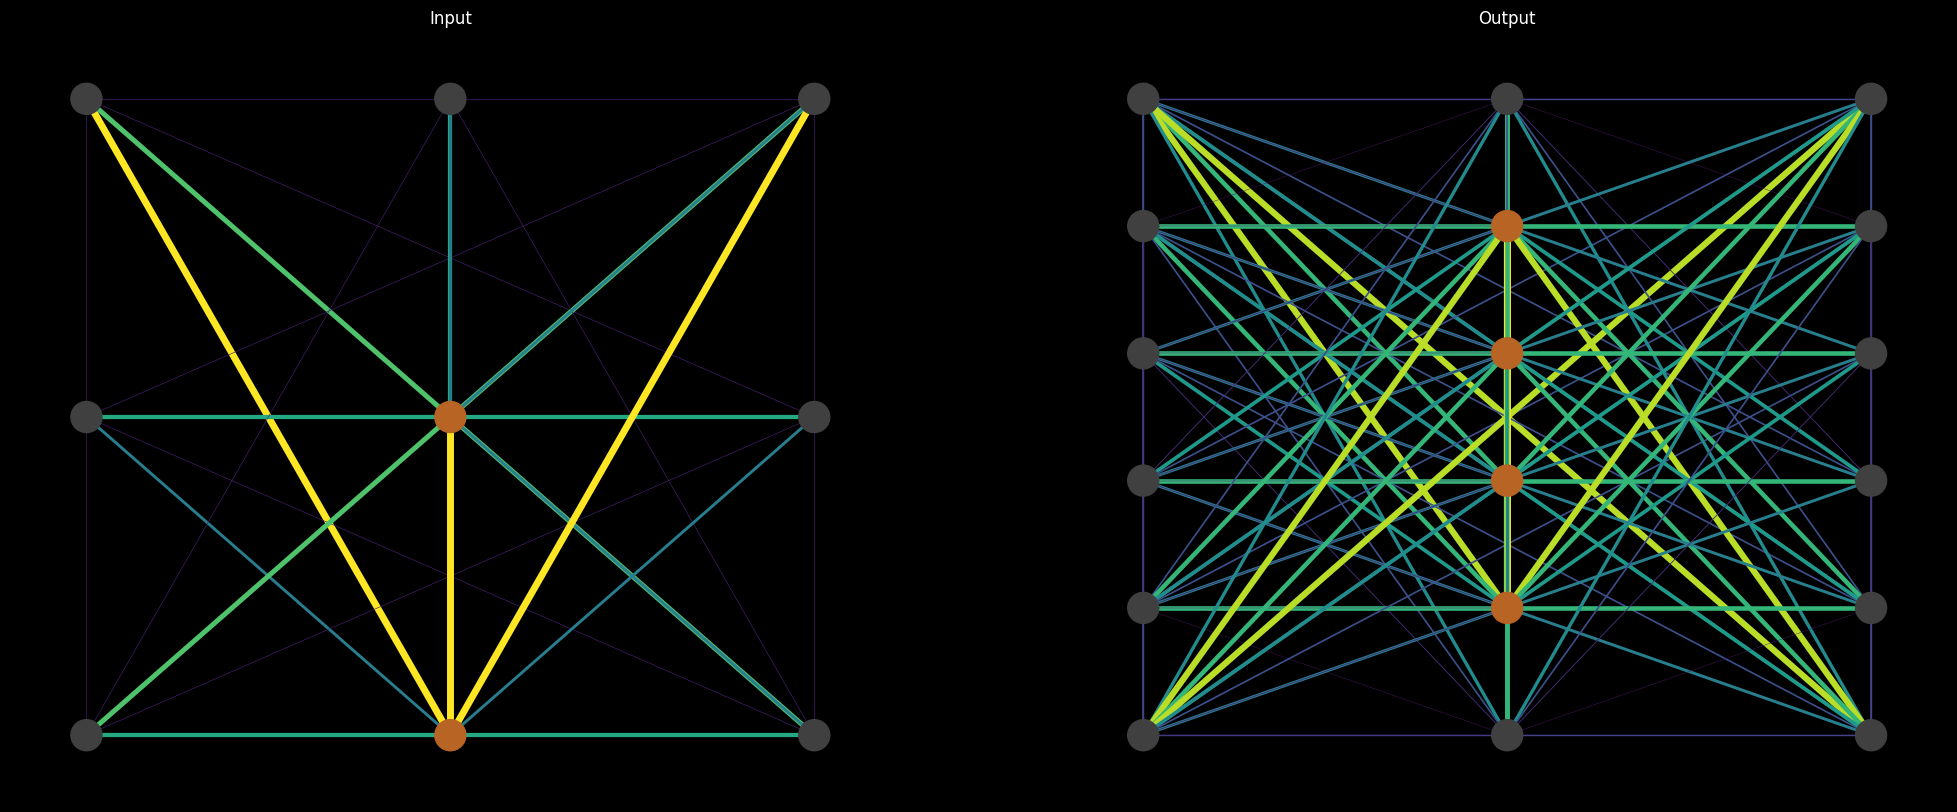

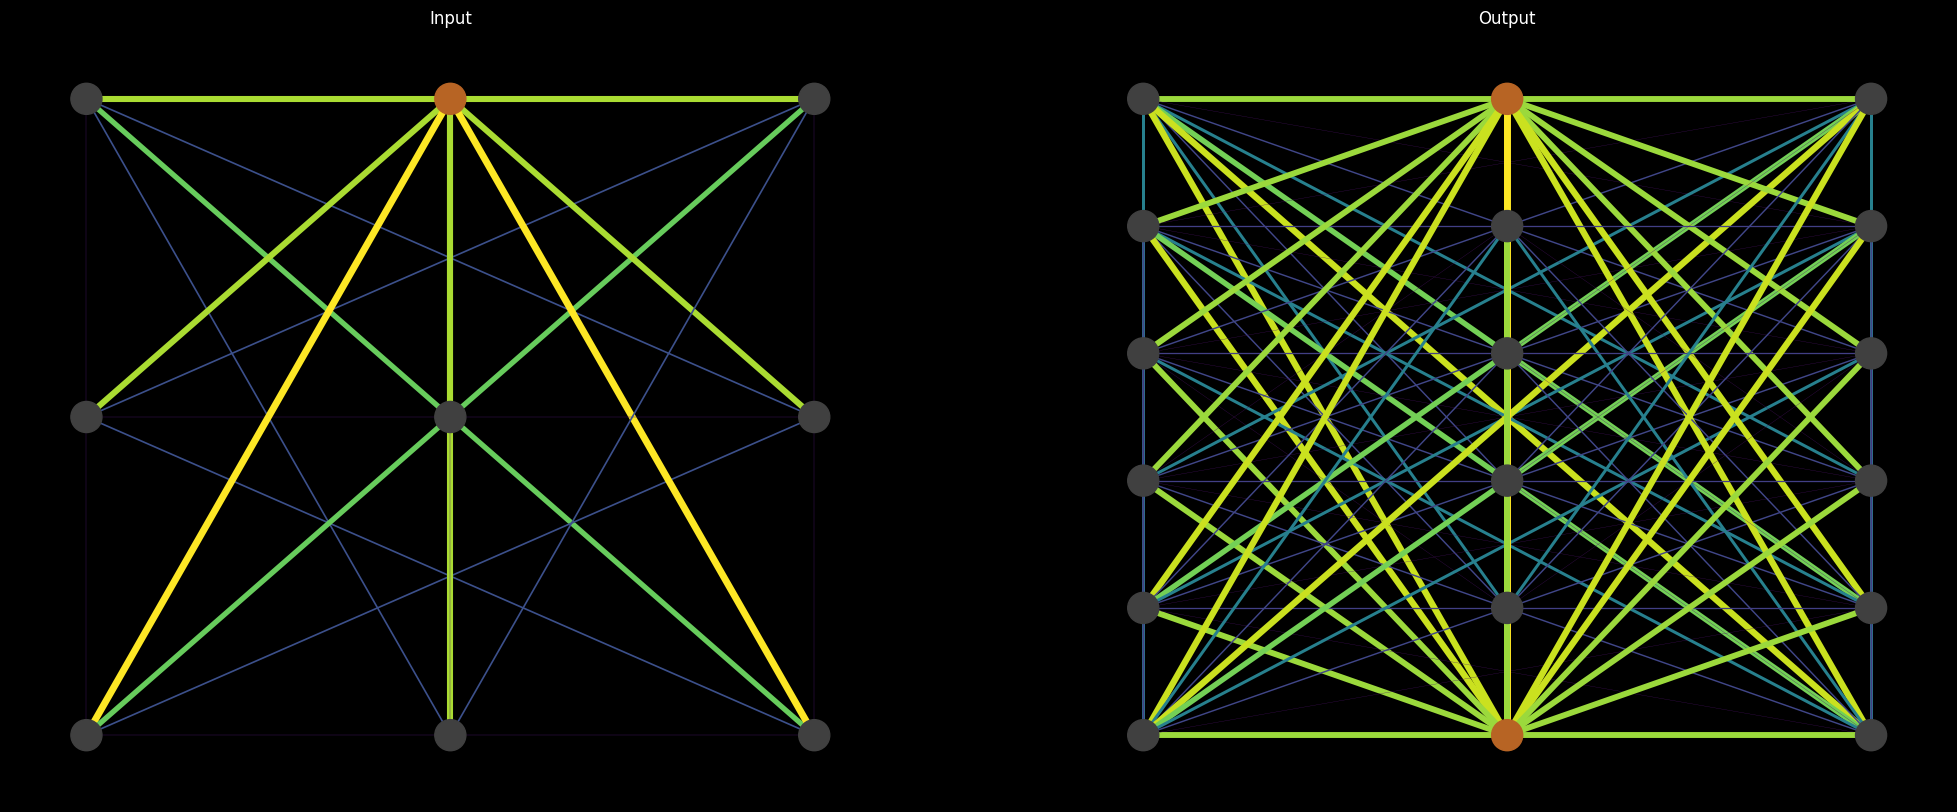

In [8]:
for board_idx in range(len(puzzle_inps_train)):
    # Weither you wish to display from training data or testing data. Here it should only be training since a training input was share.
    dataset_type = 'train'
    # Wether you wish to display output or inputfor each graph
    io1 = 'input'
    io2 = 'output'
    board_1 = anr.get_challenge_board(random_id, challenges, solutions, io1, dataset_type, board_idx)
    board_2 = anr.get_challenge_board(random_id, challenges, solutions, io2, dataset_type, board_idx)
    # Generate entropy based graph instances from boards
    grf_1 = Graph(board_1) 
    grf_2 = Graph(board_2)
    # Display both entropy based graphs
    DGV = DualGraphVisualizer(grf_1, grf_2)
    DGV.draw_with_matplotlib(show_edges=True)